# Augmentation Gallery

This example showcases different augmentations possible with DALI, using its new dynamic mode.

With dynamic mode, there's no need to build pipeline objects; we can simply use the operators as functions.

`DALI_EXTRA_PATH` environment variable should point to the place where data from [DALI extra repository](https://github.com/NVIDIA/DALI_extra) is downloaded. Please make sure that the proper release tag is checked out.

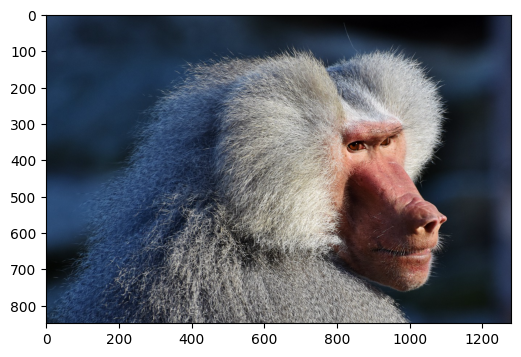

In [ ]:
import nvidia.dali.experimental.dynamic as ndd
from nvidia.dali import types
import matplotlib.pyplot as plt
import math
import os.path
import numpy as np

test_data_root = os.environ["DALI_EXTRA_PATH"]
db_folder = os.path.join(test_data_root, "db", "lmdb")
reader = dali2.readers.Caffe(path=db_folder, random_shuffle=True, seed=100)
iterator = reader.samples()
encoded, label = next(iterator)
image = dali2.decoders.image(encoded, device="mixed", output_type=types.RGB)


def imshow(image):
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(image.cpu().data)  # TODO(janton): .data shouldn't be needed.


imshow(image)

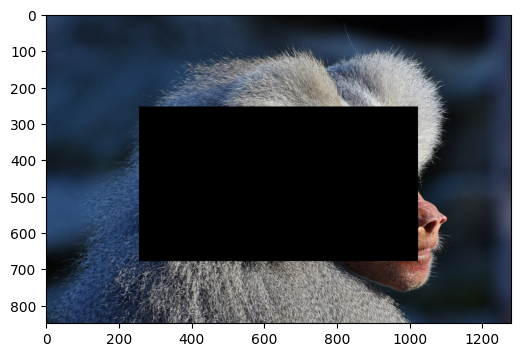

In [2]:
out0 = dali2.erase(
    image,
    anchor=[0.3, 0.2],
    shape=[0.5, 0.6],
    normalized_anchor=True,
    normalized_shape=True,
    axis_names="HW",
)
imshow(out0)

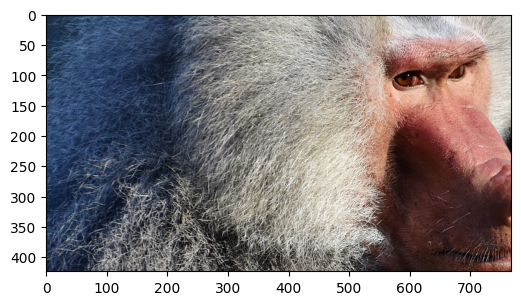

In [3]:
out1 = dali2.slice(
    image, rel_start=[0.3, 0.2], rel_shape=[0.5, 0.6], axis_names="HW"
)
imshow(out1)

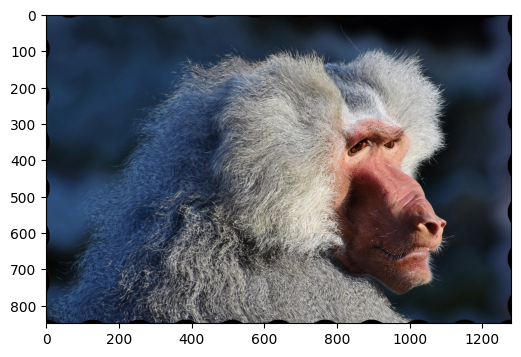

In [4]:
# transforms sampling coordinates to produce wavy patterns
out2 = dali2.water(image)
imshow(out2)

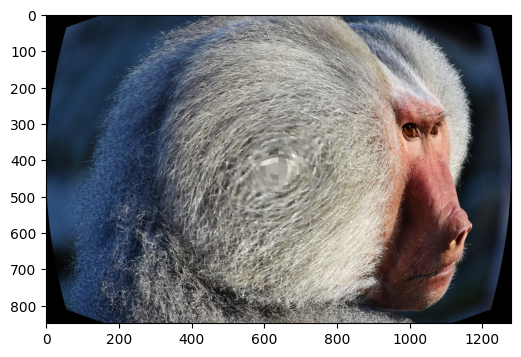

In [5]:
# applies fisheye distortion
out3 = dali2.sphere(image)
imshow(out3)

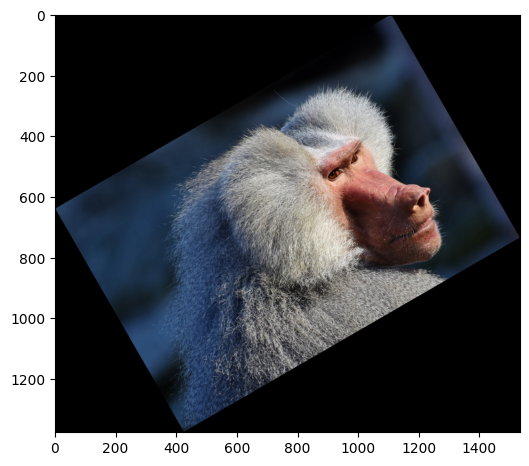

In [6]:
# rotates the image, enlarging the canvas
# TODO(janton): angle=30 doesn't work anymore. Fix this.
out4 = dali2.rotate(
    image, angle=30.0, interp_type=types.INTERP_LINEAR, fill_value=0
)
imshow(out4)

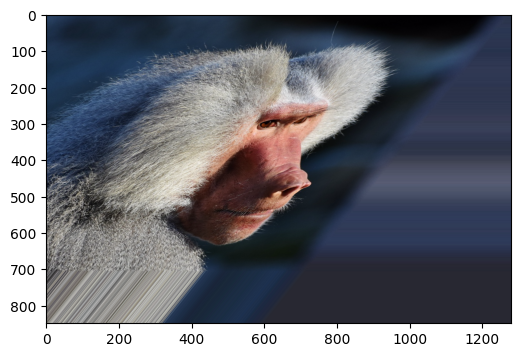

In [7]:
# applies affine transform
out5 = dali2.warp_affine(
    image,
    matrix=dali2.Tensor(
        [
            [
                1.0,
                0.8,
                0.0,
            ],
            [0.0, 1.2, 0.0],
        ]
    ),
    interp_type=types.INTERP_LINEAR,
)
imshow(out5)

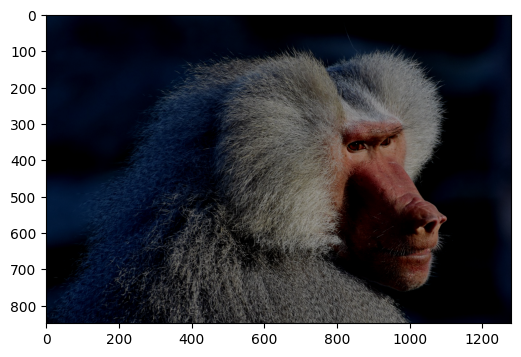

In [8]:
# manipulates brightness and contrast of the image
out6 = dali2.brightness_contrast(image, brightness=0.5, contrast=1.5)
imshow(out6)

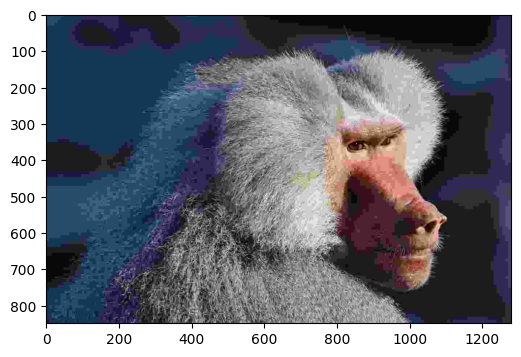

In [9]:
# Generate JPEG compression artifacts
out7 = dali2.jpeg_compression_distortion(image, quality=5)
imshow(out7)

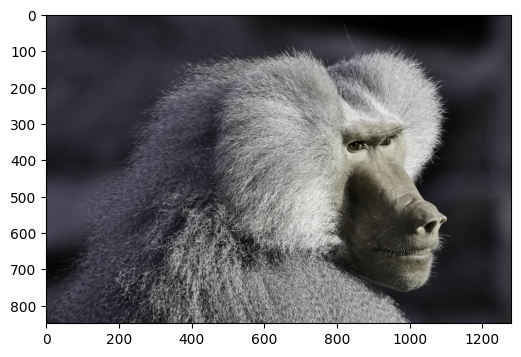

In [10]:
# twists colors of the image
out8 = dali2.hsv(image, hue=45.0, saturation=0.2)
imshow(out8)

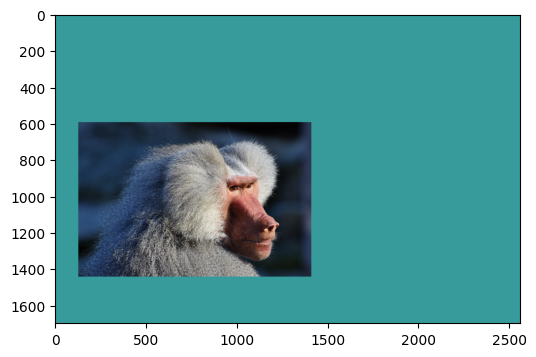

In [11]:
# places the image on a larger canvas
out9 = dali2.paste(
    image, ratio=2.0, fill_value=(55, 155, 155), paste_x=0.1, paste_y=0.7
)
imshow(out9)

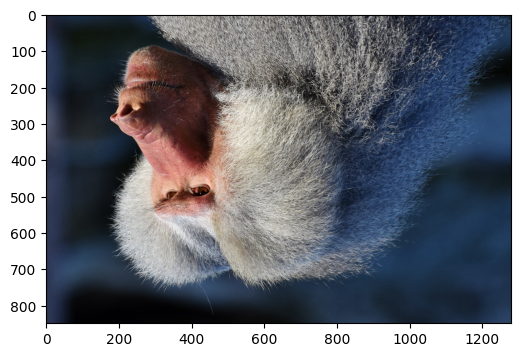

In [12]:
# param flips the image
out10 = dali2.flip(image, vertical=1, horizontal=1)
imshow(out10)